In [40]:
import json
import matplotlib.pyplot as plt
import numpy as np
import time

In [41]:
f_case = open('case_2_1.json')
data_case = json.load(f_case)
x_axis = np.array(data_case['XAXIS'])
fy_axis = np.array(data_case['YAXIS'])
N = data_case['N']
M = data_case['M']
r = data_case['R']
phi = data_case['PHI']
eps = data_case['EPS']
delta = 0.1

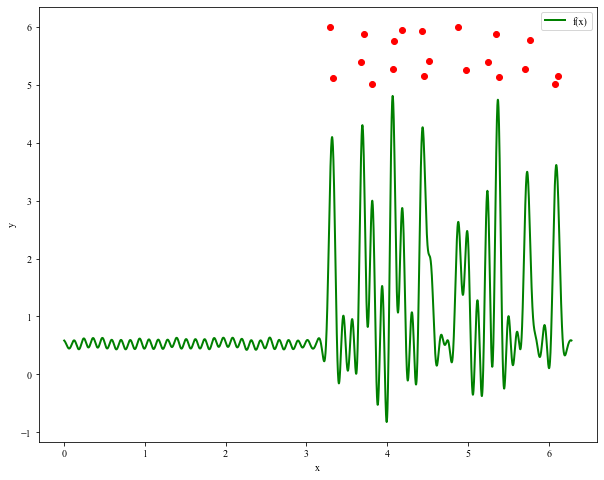

4.5 54
time: 0.12397120800000039


In [42]:
start = time.perf_counter()
plt.figure(figsize=(10, 8))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_axis, fy_axis, color='g', label='f(x)', lw=2, fillstyle='none')#f(x)

cx_axis = [[]*(N+1) for i in range(N+1)]#точки
cy_axis = [[]*(N+1) for i in range(N+1)]

for j in range (N+1):
  cy_axis[j] = np.arange(r[j],r[j]+delta, delta+1)
  for x in cy_axis[j]:
    cx_axis[j].append(phi[j])
for j in range(N):
  plt.plot(cx_axis[j], cy_axis[j], color='r', lw=5, fillstyle='full', marker='o')
plt.legend()
plt.show()
print(eps,M)
print("time:", time.perf_counter() - start)